## Задание 3
### Обучение модели YOLO

Требуется обучить модель на основе Humble Yolo распознавать два класса объектов на изображении. 
Исходный код модели есть на GitHub. Требуется изменить создание синтетических данных так, чтобы вместо двух строк использовались два изображения на ваш выбор. Размер, количество и расположение изображений задается случайным образом. 

Результат работы оформите в виде записной книжки Jupyter, в которой должно быть создание синтетических данных, обучение модели и применение модели для обнаружения объектов на тестовых изображениях.

#### Создание синтетических данных

In [55]:
from PIL import Image, ImageDraw
import random
import string
import numpy as np

def one_hot(x, length):
    return [1 if x==i else 0 for i in range(length)]

def get_word(c):
    words = ["Lamba", "Bull", "none"]
    return (words[c], one_hot(c,len(words)))

cell_w = 32
cell_h = 32
grid_w = 2
grid_h = 2

for j in range(0,5000):
    img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
    d = ImageDraw.Draw(img)
    
    with open('Labels/%d.txt' % j,'w+') as f:
     
        for row in range(grid_w):
            for col in range(grid_h):

                (digits, cat) = get_word(random.randint(0,2))

                width = len(digits)*6
                
                if(digits=='none'):
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]) )        
                    f.write('%d %d %d %d\n' % ( col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h ))
                    f.write('0\n') # confidence of object
                    print("None", (col,row), (col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h), 0)
                elif (digits == 'Lamba'):
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    imageLamba = Image.open(r'C:\Users\Мария\JupyterNotebook_ML\car.png')
                    xCoord = x - width // 2
                    yCoord = y - 10 // 2
                    img.paste(imageLamba, (xCoord, yCoord))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width, 10), 1)
                else:
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    imageBull = Image.open(r'C:\Users\Мария\JupyterNotebook_ML\3.png')
                    xCoord = x - width // 2
                    yCoord = y - 10 // 2
                    img.paste(imageBull, (xCoord, yCoord))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width, 10), 1)
        
        f.write('---\n')

    img.save('Images/%d.PNG' % j)


None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 8, 24, 10) 1
Objt (0, 1) (24, 33, 30, 10) 1
Objt (1, 1) (53, 53, 24, 10) 1
Objt (0, 0) (4, 13, 30, 10) 1
Objt (1, 0) (46, 0, 24, 10) 1
Objt (0, 1) (23, 50, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 14, 30, 10) 1
Objt (0, 1) (13, 59, 30, 10) 1
Objt (1, 1) (49, 35, 30, 10) 1
Objt (0, 0) (13, 3, 24, 10) 1
Objt (1, 0) (51, 12, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 27, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 43, 30, 10) 1
Objt (1, 1) (61, 40, 30, 10) 1
Objt (0, 0) (6, 10, 24, 10) 1
Objt (1, 0) (59, 18, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 4

Objt (1, 0) (33, 31, 24, 10) 1
Objt (0, 1) (26, 44, 24, 10) 1
Objt (1, 1) (47, 54, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 27, 30, 10) 1
Objt (0, 1) (29, 62, 24, 10) 1
Objt (1, 1) (48, 48, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 10, 30, 10) 1
Objt (0, 1) (12, 44, 30, 10) 1
Objt (1, 1) (37, 43, 24, 10) 1
Objt (0, 0) (22, 12, 24, 10) 1
Objt (1, 0) (32, 22, 30, 10) 1
Objt (0, 1) (18, 33, 30, 10) 1
Objt (1, 1) (34, 33, 24, 10) 1
Objt (0, 0) (3, 29, 30, 10) 1
Objt (1, 0) (41, 17, 30, 10) 1
Objt (0, 1) (21, 35, 30, 10) 1
Objt (1, 1) (58, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 23, 24, 10) 1
Objt (0, 1) (15, 48, 30, 10) 1
Objt (1, 1) (51, 51, 24, 10) 1
Objt (0, 0) (2, 3, 30, 10) 1
Objt (1, 0) (55, 26, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 45, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 56, 30, 10) 1
Objt (0, 0) (1

Objt (0, 0) (26, 11, 30, 10) 1
Objt (1, 0) (47, 10, 24, 10) 1
Objt (0, 1) (23, 40, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 9, 24, 10) 1
Objt (1, 0) (38, 3, 30, 10) 1
Objt (0, 1) (24, 44, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 31, 30, 10) 1
Objt (1, 0) (61, 29, 24, 10) 1
Objt (0, 1) (21, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 48, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 9, 24, 10) 1
Objt (1, 0) (59, 6, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 58, 30, 10) 1
Objt (0, 0) (11, 13, 30, 10) 1
Objt (1, 0) (38, 11, 24, 10) 1
Objt (0, 1) (29, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 20, 30, 10) 1
Objt (1, 0) (37, 22, 24, 10) 1
Objt (0, 1) (16, 36, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 48, 24, 10) 1

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 15, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 33, 30, 10) 1
Objt (0, 0) (4, 18, 30, 10) 1
Objt (1, 0) (60, 30, 30, 10) 1
Objt (0, 1) (4, 34, 24, 10) 1
Objt (1, 1) (53, 60, 24, 10) 1
Objt (0, 0) (19, 12, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 35, 24, 10) 1
Objt (0, 0) (31, 13, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 35, 30, 10) 1
Objt (1, 1) (32, 59, 30, 10) 1
Objt (0, 0) (18, 21, 30, 10) 1
Objt (1, 0) (37, 19, 24, 10) 1
Objt (0, 1) (20, 32, 24, 10) 1
Objt (1, 1) (40, 44, 24, 10) 1
Objt (0, 0) (4, 21, 24, 10) 1
Objt (1, 0) (54, 8, 30, 10) 1
Objt (0, 1) (5, 40, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 14, 30, 10) 1
Objt (1, 0) (57, 19, 30, 10) 1
Objt (0, 1) (19, 57, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 21, 24, 10) 1
Objt (1, 0) (54, 10, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (

Objt (0, 0) (17, 29, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 9, 24, 10) 1
Objt (1, 0) (41, 15, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 39, 30, 10) 1
Objt (0, 0) (6, 1, 30, 10) 1
Objt (1, 0) (58, 18, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 9, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 15, 24, 10) 1
Objt (1, 0) (40, 22, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 43, 30, 10) 1
Objt (0, 0) (22, 16, 24, 10) 1
Objt (1, 0) (35, 3, 30, 10) 1
Objt (0, 1) (27, 41, 24, 10) 1
Objt (1, 1) (53, 58, 30, 10) 1
Objt (0, 0) (13, 29, 30, 10) 1
Objt (1, 0) (51, 29, 24, 10) 1
Objt (0, 1) (3, 45, 24, 10) 1
Objt (1, 1) (61, 32, 24, 10) 1
Objt (0, 0) (22, 0, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 41, 24, 10) 1
Objt (1,

Objt (0, 1) (21, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 17, 24, 10) 1
Objt (1, 0) (56, 5, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 1, 30, 10) 1
Objt (0, 1) (2, 38, 30, 10) 1
Objt (1, 1) (37, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 13, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 60, 24, 10) 1
Objt (0, 0) (9, 27, 24, 10) 1
Objt (1, 0) (49, 21, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 48, 24, 10) 1
Objt (0, 0) (10, 13, 24, 10) 1
Objt (1, 0) (41, 13, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 54, 24, 10) 1
Objt (0, 0) (11, 18, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 54, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (2, 0, 24, 10) 1
Objt (1, 0) (58, 24, 24, 10) 1
Objt (0, 1) (28, 57, 30, 10) 1
Objt (1, 1) (41, 60, 24, 10) 1
Objt (0, 0) (27, 13, 24, 10) 1
Objt (1, 

Objt (0, 1) (3, 59, 24, 10) 1
Objt (1, 1) (51, 56, 24, 10) 1
Objt (0, 0) (20, 21, 30, 10) 1
Objt (1, 0) (52, 18, 24, 10) 1
Objt (0, 1) (6, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 10, 30, 10) 1
Objt (0, 1) (0, 43, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 6, 30, 10) 1
Objt (1, 0) (36, 13, 24, 10) 1
Objt (0, 1) (0, 59, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 3, 30, 10) 1
Objt (1, 0) (50, 29, 30, 10) 1
Objt (0, 1) (0, 62, 30, 10) 1
Objt (1, 1) (52, 60, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 10, 24, 10) 1
Objt (0, 1) (12, 41, 24, 10) 1
Objt (1, 1) (54, 32, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 12, 30, 10) 1
Objt (1, 0) (63, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Obj

Objt (1, 0) (47, 0, 24, 10) 1
Objt (0, 1) (0, 51, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 23, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 49, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 7, 24, 10) 1
Objt (0, 1) (21, 34, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 32, 30, 10) 1
Objt (1, 1) (49, 32, 24, 10) 1
Objt (0, 0) (7, 31, 30, 10) 1
Objt (1, 0) (63, 16, 30, 10) 1
Objt (0, 1) (1, 55, 30, 10) 1
Objt (1, 1) (58, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 35, 30, 10) 1
Objt (1, 1) (59, 51, 30, 10) 1
Objt (0, 0) (28, 3, 24, 10) 1
Objt (1, 0) (49, 25, 24, 10) 1
Objt (0, 1) (5, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 30, 24, 10) 1
Objt (1, 0) (35, 12, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0


None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 4, 30, 10) 1
Objt (0, 1) (27, 59, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 46, 30, 10) 1
Objt (1, 1) (39, 38, 24, 10) 1
Objt (0, 0) (9, 16, 24, 10) 1
Objt (1, 0) (58, 15, 30, 10) 1
Objt (0, 1) (13, 39, 30, 10) 1
Objt (1, 1) (33, 51, 30, 10) 1
Objt (0, 0) (0, 12, 30, 10) 1
Objt (1, 0) (54, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 9, 30, 10) 1
Objt (0, 1) (13, 33, 30, 10) 1
Objt (1, 1) (43, 36, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 19, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 52, 30, 10) 1
Objt (0, 0) (14, 11, 24, 10) 1
Objt (1, 0) (61, 9, 24, 10) 1
Objt (0, 1) (20, 59, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 11, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32

Objt (1, 1) (53, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 22, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 25, 30, 10) 1
Objt (1, 0) (61, 7, 30, 10) 1
Objt (0, 1) (28, 41, 30, 10) 1
Objt (1, 1) (53, 61, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 2, 24, 10) 1
Objt (0, 1) (24, 49, 30, 10) 1
Objt (1, 1) (48, 45, 30, 10) 1
Objt (0, 0) (25, 22, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 35, 24, 10) 1
Objt (0, 0) (27, 18, 30, 10) 1
Objt (1, 0) (52, 7, 24, 10) 1
Objt (0, 1) (25, 45, 24, 10) 1
Objt (1, 1) (42, 46, 30, 10) 1
Objt (0, 0) (3, 1, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 59, 30, 10) 1
Objt (1, 1) (55, 62, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 11, 24, 10) 1
Objt (0, 1) (26, 50, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 20, 24, 10) 1
Objt 

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 26, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 57, 24, 10) 1
Objt (0, 0) (23, 27, 24, 10) 1
Objt (1, 0) (41, 29, 30, 10) 1
Objt (0, 1) (12, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 25, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 61, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 23, 30, 10) 1
Objt (1, 0) (57, 31, 30, 10) 1
Objt (0, 1) (18, 60, 24, 10) 1
Objt (1, 1) (50, 57, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 13, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 43, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 38, 24, 10) 1
Objt (1, 1) (35, 49, 24, 10) 1
Objt (0, 0) (15, 10, 30, 10) 1
Objt (1, 0) (41, 1, 30, 10) 1
Objt (0, 1) (18, 55, 30,

Objt (0, 1) (16, 42, 24, 10) 1
Objt (1, 1) (57, 36, 24, 10) 1
Objt (0, 0) (22, 0, 24, 10) 1
Objt (1, 0) (52, 16, 24, 10) 1
Objt (0, 1) (9, 51, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 50, 30, 10) 1
Objt (1, 1) (43, 59, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 48, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 28, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 24, 30, 10) 1
Objt (1, 0) (57, 9, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 31, 24, 10) 1
Objt (1, 0) (56, 28, 30, 10) 1
Objt (0, 1) (30, 51, 24, 10) 1
Objt (1, 1) (36, 49, 30, 10) 1
Objt (0, 0) (23, 23, 30, 10) 1
Objt (1, 0) (43, 13, 24, 10) 1
Objt (0, 1) (26, 32, 24, 10) 1
Objt (1, 1) (50, 62, 24, 10) 1
Objt (0, 0) (30, 20, 30, 10) 

Objt (1, 0) (34, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 10, 24, 10) 1
Objt (1, 0) (62, 30, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 10, 24, 10) 1
Objt (1, 0) (57, 14, 30, 10) 1
Objt (0, 1) (5, 35, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 22, 24, 10) 1
Objt (1, 0) (36, 21, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 51, 30, 10) 1
Objt (0, 0) (18, 0, 30, 10) 1
Objt (1, 0) (34, 4, 30, 10) 1
Objt (0, 1) (2, 53, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 22, 24, 10) 1
Objt (1, 0) (52, 29, 30, 10) 1
Objt (0, 1) (31, 57, 30, 10) 1
Objt (1, 1) (51, 41, 30, 10) 1
Objt (0, 0) (13, 12, 24, 10) 1
Objt (1, 0) (42, 6, 30, 10) 1
Objt (0, 1) (4, 63, 30, 10) 1
Objt (1, 1) (32, 50, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 50, 24, 10) 1
Objt (1, 1) (63, 48, 24, 10) 1
None (0, 0)

Objt (1, 0) (53, 3, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 33, 30, 10) 1
Objt (0, 0) (2, 25, 30, 10) 1
Objt (1, 0) (53, 28, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (48, 46, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 3, 30, 10) 1
Objt (0, 1) (21, 32, 24, 10) 1
Objt (1, 1) (38, 58, 24, 10) 1
Objt (0, 0) (5, 16, 24, 10) 1
Objt (1, 0) (49, 1, 30, 10) 1
Objt (0, 1) (21, 40, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 40, 24, 10) 1
Objt (1, 1) (35, 57, 30, 10) 1
Objt (0, 0) (8, 26, 30, 10) 1
Objt (1, 0) (58, 22, 24, 10) 1
Objt (0, 1) (23, 47, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 57, 30, 10) 1
Objt (0, 0) (18, 10, 30, 10) 1
Objt (1, 0) (60, 5, 30, 10) 1
Objt (0, 1) (27, 38, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Obj

Objt (0, 0) (28, 18, 24, 10) 1
Objt (1, 0) (41, 26, 24, 10) 1
Objt (0, 1) (8, 63, 30, 10) 1
Objt (1, 1) (46, 32, 24, 10) 1
Objt (0, 0) (2, 23, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 38, 30, 10) 1
Objt (1, 1) (52, 51, 30, 10) 1
Objt (0, 0) (0, 4, 24, 10) 1
Objt (1, 0) (52, 5, 24, 10) 1
Objt (0, 1) (2, 36, 24, 10) 1
Objt (1, 1) (33, 63, 30, 10) 1
Objt (0, 0) (31, 7, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 54, 24, 10) 1
Objt (1, 1) (34, 60, 30, 10) 1
Objt (0, 0) (3, 25, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 26, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 42, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 2, 30, 10) 1
Objt (0, 1) (16, 40, 30, 10) 1
Objt (1, 1)

Objt (0, 0) (31, 27, 30, 10) 1
Objt (1, 0) (51, 2, 24, 10) 1
Objt (0, 1) (5, 35, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 4, 24, 10) 1
Objt (1, 0) (43, 5, 24, 10) 1
Objt (0, 1) (27, 47, 24, 10) 1
Objt (1, 1) (34, 47, 30, 10) 1
Objt (0, 0) (2, 21, 30, 10) 1
Objt (1, 0) (56, 30, 30, 10) 1
Objt (0, 1) (7, 49, 24, 10) 1
Objt (1, 1) (53, 41, 30, 10) 1
Objt (0, 0) (5, 22, 24, 10) 1
Objt (1, 0) (56, 31, 30, 10) 1
Objt (0, 1) (7, 58, 24, 10) 1
Objt (1, 1) (39, 58, 24, 10) 1
Objt (0, 0) (10, 26, 30, 10) 1
Objt (1, 0) (33, 26, 30, 10) 1
Objt (0, 1) (20, 48, 30, 10) 1
Objt (1, 1) (52, 38, 24, 10) 1
Objt (0, 0) (28, 18, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 47, 24, 10) 1
Objt (0, 0) (30, 7, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 41, 24, 10) 1
Objt (0, 0) (17, 12, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 45,

Objt (0, 1) (12, 36, 24, 10) 1
Objt (1, 1) (34, 48, 24, 10) 1
Objt (0, 0) (1, 18, 30, 10) 1
Objt (1, 0) (38, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 3, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 50, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 30, 30, 10) 1
Objt (0, 1) (22, 59, 30, 10) 1
Objt (1, 1) (35, 50, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 35, 24, 10) 1
Objt (1, 1) (54, 62, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 25, 24, 10) 1
Objt (1, 0) (59, 4, 30, 10) 1
Objt (0, 1) (7, 63, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 6, 

Objt (0, 0) (19, 19, 30, 10) 1
Objt (1, 0) (36, 31, 30, 10) 1
Objt (0, 1) (6, 53, 24, 10) 1
Objt (1, 1) (51, 48, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 57, 24, 10) 1
Objt (1, 1) (62, 42, 24, 10) 1
Objt (0, 0) (11, 12, 30, 10) 1
Objt (1, 0) (32, 26, 24, 10) 1
Objt (0, 1) (15, 40, 24, 10) 1
Objt (1, 1) (41, 50, 30, 10) 1
Objt (0, 0) (0, 11, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 8, 30, 10) 1
Objt (0, 1) (31, 36, 24, 10) 1
Objt (1, 1) (59, 51, 30, 10) 1
Objt (0, 0) (0, 29, 30, 10) 1
Objt (1, 0) (60, 31, 24, 10) 1
Objt (0, 1) (6, 61, 30, 10) 1
Objt (1, 1) (55, 49, 30, 10) 1
Objt (0, 0) (14, 23, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (48, 55, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 49, 24, 10) 1
Objt (1,

Objt (0, 0) (22, 1, 30, 10) 1
Objt (1, 0) (61, 23, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 40, 24, 10) 1
Objt (0, 0) (21, 12, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 45, 30, 10) 1
Objt (1, 1) (49, 51, 30, 10) 1
Objt (0, 0) (29, 7, 24, 10) 1
Objt (1, 0) (33, 9, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 36, 30, 10) 1
Objt (0, 0) (9, 31, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 50, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 13, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 36, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 27, 24, 10) 1
Objt (0, 1) (25, 55, 24, 10) 1
Objt (1, 1) (58, 54, 30, 10) 1
Objt (0, 0) (15, 15, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 52, 24, 10) 1
Objt (1, 1) (57, 48, 30, 10) 1
Objt (0, 0) (16, 7, 24, 10) 1
Objt (1, 0) (36, 16, 30, 10) 1
Objt (0, 1) (22, 50, 30, 10) 1
None (1, 

Objt (0, 1) (25, 53, 30, 10) 1
Objt (1, 1) (54, 47, 24, 10) 1
Objt (0, 0) (29, 17, 30, 10) 1
Objt (1, 0) (49, 27, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 49, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 62, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 7, 24, 10) 1
Objt (1, 0) (54, 22, 24, 10) 1
Objt (0, 1) (24, 54, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 29, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (53, 47, 30, 10) 1
Objt (0, 0) (21, 27, 24, 10) 1
Objt (1, 0) (37, 14, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 7, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 3, 24, 10) 1
Objt (1, 0) (61, 24, 24, 10) 1
Objt (0, 1) (6, 59, 30, 10) 1
Objt (1, 1) (52, 49, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32)

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 9, 24, 10) 1
Objt (0, 1) (25, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 18, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 33, 30, 10) 1
Objt (1, 1) (36, 55, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 28, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 36, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 26, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 53, 24, 10) 1
Objt (0, 0) (20, 13, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 55, 24, 10) 1
Objt (0, 0) (22, 1, 30, 10) 1
Objt (1, 0) (48, 13, 30, 10) 1
Objt (0, 1) (0, 46, 30, 10) 1
Objt (1, 1) (42, 42, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 0, 30, 10) 1
Objt (0, 1) (29, 61, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 3, 30, 10) 1
Objt (1, 0) (36, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32)

Objt (0, 0) (4, 20, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 1, 24, 10) 1
Objt (1, 0) (35, 28, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 42, 30, 10) 1
Objt (0, 0) (24, 4, 30, 10) 1
Objt (1, 0) (47, 2, 24, 10) 1
Objt (0, 1) (16, 60, 30, 10) 1
Objt (1, 1) (63, 59, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 36, 30, 10) 1
Objt (0, 0) (31, 24, 30, 10) 1
Objt (1, 0) (37, 29, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 6, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 50, 30, 10) 1
Objt (0, 0) (8, 19, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 58, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 

Objt (0, 0) (17, 11, 24, 10) 1
Objt (1, 0) (54, 10, 30, 10) 1
Objt (0, 1) (15, 59, 24, 10) 1
Objt (1, 1) (61, 37, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 36, 24, 10) 1
Objt (1, 1) (53, 61, 24, 10) 1
Objt (0, 0) (31, 19, 24, 10) 1
Objt (1, 0) (47, 12, 30, 10) 1
Objt (0, 1) (10, 40, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 5, 30, 10) 1
Objt (1, 0) (54, 14, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 37, 24, 10) 1
Objt (0, 0) (12, 4, 24, 10) 1
Objt (1, 0) (62, 17, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 16, 30, 10) 1
Objt (0, 1) (21, 56, 30, 10) 1
Objt (1, 1) (58, 38, 24, 10) 1
Objt (0, 0) (2, 4, 24, 10) 1
Objt (1, 0) (63, 27, 30, 10) 1
Objt (0, 1) (23, 60, 30, 10) 1
Objt (1, 1) (49, 53, 30, 10) 1
Objt (0, 0) (19, 17, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 43, 30, 10) 1
Objt (1, 1) (35

Objt (0, 0) (0, 6, 30, 10) 1
Objt (1, 0) (60, 12, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 44, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 20, 24, 10) 1
Objt (0, 1) (23, 63, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 19, 24, 10) 1
Objt (1, 0) (32, 29, 30, 10) 1
Objt (0, 1) (12, 46, 24, 10) 1
Objt (1, 1) (54, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 5, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 37, 24, 10) 1
Objt (1, 1) (57, 40, 24, 10) 1
Objt (0, 0) (31, 28, 30, 10) 1
Objt (1, 0) (56, 27, 30, 10) 1
Objt (0, 1) (0, 34, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 21, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 51, 30, 10) 1
Objt (0, 0) (17, 17, 30, 10) 1
Objt (1, 0) (49, 22, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32

Objt (0, 1) (4, 62, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 24, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 50, 30, 10) 1
Objt (1, 1) (38, 36, 24, 10) 1
Objt (0, 0) (0, 10, 24, 10) 1
Objt (1, 0) (34, 18, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 36, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 22, 30, 10) 1
Objt (0, 1) (15, 46, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 14, 30, 10) 1
Objt (1, 0) (47, 21, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 5, 30, 10) 1
Objt (0, 1) (6, 35, 24, 10) 1
Objt (1, 1) (49, 58, 24, 10) 1
Objt (0, 0) (7, 27, 24, 10) 1
Objt (1, 0) (50, 21, 30, 10) 1
Objt (0, 1) (21, 63, 24, 10) 1
Objt (1, 1) (37, 50, 30, 10) 1
Objt (0, 0) (25, 8, 24, 10) 1
Objt (1, 0) (56, 19, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 21, 24, 10) 1
Objt (

Objt (1, 1) (49, 39, 30, 10) 1
Objt (0, 0) (16, 1, 30, 10) 1
Objt (1, 0) (48, 3, 30, 10) 1
Objt (0, 1) (27, 46, 30, 10) 1
Objt (1, 1) (47, 38, 30, 10) 1
Objt (0, 0) (6, 6, 24, 10) 1
Objt (1, 0) (36, 0, 30, 10) 1
Objt (0, 1) (3, 48, 30, 10) 1
Objt (1, 1) (59, 50, 30, 10) 1
Objt (0, 0) (7, 19, 24, 10) 1
Objt (1, 0) (55, 24, 24, 10) 1
Objt (0, 1) (0, 54, 30, 10) 1
Objt (1, 1) (54, 55, 30, 10) 1
Objt (0, 0) (20, 2, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 41, 30, 10) 1
Objt (1, 1) (34, 53, 24, 10) 1
Objt (0, 0) (14, 30, 30, 10) 1
Objt (1, 0) (61, 26, 24, 10) 1
Objt (0, 1) (2, 63, 24, 10) 1
Objt (1, 1) (51, 52, 24, 10) 1
Objt (0, 0) (3, 9, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 8, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 33, 30, 10) 1
Objt (0, 0) (5, 23, 30, 10) 1
Objt (1, 0) (35, 5, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0

Objt (1, 1) (37, 34, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 25, 30, 10) 1
Objt (0, 1) (13, 63, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 31, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 5, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 44, 24, 10) 1
Objt (1, 1) (47, 63, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 20, 30, 10) 1
Objt (0, 1) (28, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 3, 24, 10) 1
Objt (0, 1) (15, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 5, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 32, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 29, 30, 10) 1
None (1, 0) (4

Objt (0, 0) (27, 28, 30, 10) 1
Objt (1, 0) (50, 27, 24, 10) 1
Objt (0, 1) (14, 48, 30, 10) 1
Objt (1, 1) (44, 38, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 45, 24, 10) 1
Objt (0, 0) (31, 23, 30, 10) 1
Objt (1, 0) (35, 14, 30, 10) 1
Objt (0, 1) (30, 44, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 51, 24, 10) 1
Objt (1, 1) (52, 37, 24, 10) 1
Objt (0, 0) (2, 22, 24, 10) 1
Objt (1, 0) (41, 22, 24, 10) 1
Objt (0, 1) (26, 34, 30, 10) 1
Objt (1, 1) (60, 62, 24, 10) 1
Objt (0, 0) (30, 5, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 35, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 14, 24, 10) 1
Objt (1, 0) (57, 31, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 53, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 57, 30, 10) 1

Objt (0, 0) (5, 23, 24, 10) 1
Objt (1, 0) (60, 18, 24, 10) 1
Objt (0, 1) (27, 47, 30, 10) 1
Objt (1, 1) (35, 49, 24, 10) 1
Objt (0, 0) (31, 20, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 14, 30, 10) 1
Objt (0, 1) (6, 43, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 8, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (53, 62, 30, 10) 1
Objt (0, 0) (31, 8, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 60, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (53, 42, 30, 10) 1
Objt (0, 0) (25, 14, 30, 10) 1
Objt (1, 0) (57, 9, 30, 10) 1
Objt (0, 1) (19, 50, 30, 10) 1
Objt (1, 1) (44, 47, 30, 10) 1
Objt (0, 0) (28, 14, 30, 10) 1
Objt (1, 0) (37, 30, 30, 10) 1
Objt (0, 1) (3, 48, 30, 10) 1
O

Objt (0, 0) (16, 11, 30, 10) 1
Objt (1, 0) (35, 25, 24, 10) 1
Objt (0, 1) (22, 37, 24, 10) 1
Objt (1, 1) (54, 56, 30, 10) 1
Objt (0, 0) (29, 26, 30, 10) 1
Objt (1, 0) (36, 11, 24, 10) 1
Objt (0, 1) (0, 51, 30, 10) 1
Objt (1, 1) (59, 38, 30, 10) 1
Objt (0, 0) (23, 23, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 58, 30, 10) 1
Objt (0, 0) (4, 8, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 39, 30, 10) 1
Objt (1, 1) (61, 41, 30, 10) 1
Objt (0, 0) (4, 30, 24, 10) 1
Objt (1, 0) (60, 6, 30, 10) 1
Objt (0, 1) (17, 37, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 37, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 1, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 36, 30, 10) 1
Objt (0, 0) (2, 1, 24, 10) 1
Objt (1, 0) (49, 0, 24, 10) 1
Objt (0, 1) (7, 63, 30, 10) 1
Objt (1, 1) (4

Objt (0, 0) (22, 1, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 39, 30, 10) 1
Objt (1, 1) (46, 44, 24, 10) 1
Objt (0, 0) (6, 9, 30, 10) 1
Objt (1, 0) (60, 10, 30, 10) 1
Objt (0, 1) (8, 42, 24, 10) 1
Objt (1, 1) (41, 58, 24, 10) 1
Objt (0, 0) (13, 5, 24, 10) 1
Objt (1, 0) (47, 10, 24, 10) 1
Objt (0, 1) (25, 47, 24, 10) 1
Objt (1, 1) (50, 57, 24, 10) 1
Objt (0, 0) (24, 20, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 57, 24, 10) 1
Objt (0, 0) (29, 8, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 44, 30, 10) 1
Objt (1, 1) (54, 48, 30, 10) 1
Objt (0, 0) (17, 0, 24, 10) 1
Objt (1, 0) (53, 26, 30, 10) 1
Objt (0, 1) (17, 40, 24, 10) 1
Objt (1, 1) (54, 47, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 27, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 39, 24, 10) 1
None (1, 1) (48.

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 32, 24, 10) 1
Objt (1, 1) (49, 34, 24, 10) 1
Objt (0, 0) (6, 18, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 49, 30, 10) 1
Objt (1, 1) (60, 39, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 20, 30, 10) 1
Objt (1, 0) (36, 8, 30, 10) 1
Objt (0, 1) (14, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 15, 30, 10) 1
Objt (1, 0) (57, 9, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 9, 24, 10) 1
Objt (1, 0) (56, 19, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 58, 24, 10) 1
Objt (1, 1) (63, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 19, 24, 10) 1
Objt (0, 1) (5, 54,

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 8, 24, 10) 1
Objt (0, 1) (17, 47, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 16, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 48, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 42, 24, 10) 1
Objt (1, 1) (56, 61, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 55, 30, 10) 1
Objt (0, 0) (31, 4, 24, 10) 1
Objt (1, 0) (36, 8, 30, 10) 1
Objt (0, 1) (27, 42, 30, 10) 1
Objt (1, 1) (41, 40, 30, 10) 1
Objt (0, 0) (25, 23, 24, 10) 1
Objt (1, 0) (39, 17, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 56, 30, 10) 1
Objt (0, 0) (5, 19, 30, 10) 1
Objt (1, 0) (37, 3, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 4, 24, 10) 1
Objt (1, 0) (59, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 3

Objt (1, 0) (33, 13, 30, 10) 1
Objt (0, 1) (24, 49, 30, 10) 1
Objt (1, 1) (42, 33, 30, 10) 1
Objt (0, 0) (26, 29, 24, 10) 1
Objt (1, 0) (35, 3, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 47, 30, 10) 1
Objt (0, 0) (4, 15, 24, 10) 1
Objt (1, 0) (55, 28, 24, 10) 1
Objt (0, 1) (19, 58, 30, 10) 1
Objt (1, 1) (37, 44, 24, 10) 1
Objt (0, 0) (3, 8, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 49, 30, 10) 1
Objt (1, 1) (43, 47, 24, 10) 1
Objt (0, 0) (1, 9, 30, 10) 1
Objt (1, 0) (36, 16, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 40, 30, 10) 1
Objt (0, 0) (15, 10, 24, 10) 1
Objt (1, 0) (62, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 55, 24, 10) 1
Objt (0, 0) (26, 18, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 35, 24, 10) 1
Objt (1, 1) (35, 53, 24, 10) 1
Objt (0, 0) (21, 22, 30, 10) 1
Objt (1, 0) (35, 30, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 3,

Objt (1, 1) (61, 63, 24, 10) 1
Objt (0, 0) (26, 9, 30, 10) 1
Objt (1, 0) (62, 17, 24, 10) 1
Objt (0, 1) (27, 41, 24, 10) 1
Objt (1, 1) (36, 59, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 22, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 1, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 63, 24, 10) 1
Objt (0, 0) (6, 28, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 61, 30, 10) 1
Objt (1, 1) (54, 58, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 2, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 62, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 0, 30, 10) 1
Objt (0, 1) (25, 43, 30, 10) 1
Objt (1, 1) (58, 44, 24, 10) 1
Objt (0, 0) (24, 13, 24, 10) 1
Objt (1, 0) (56, 21, 24, 10) 1
Objt (0, 1) (13, 57, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 16, 30, 10) 1
Objt (1, 0) (54, 22, 30, 10) 1
None 

Objt (1, 1) (56, 32, 30, 10) 1
Objt (0, 0) (29, 4, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 9, 24, 10) 1
Objt (1, 0) (56, 26, 24, 10) 1
Objt (0, 1) (6, 34, 24, 10) 1
Objt (1, 1) (55, 39, 24, 10) 1
Objt (0, 0) (21, 9, 24, 10) 1
Objt (1, 0) (38, 9, 30, 10) 1
Objt (0, 1) (8, 45, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 28, 24, 10) 1
Objt (1, 0) (32, 16, 24, 10) 1
Objt (0, 1) (15, 45, 30, 10) 1
Objt (1, 1) (59, 33, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 51, 30, 10) 1
Objt (1, 1) (33, 51, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 50, 24, 10) 1
Objt (1, 1) (62, 35, 30, 10) 1
Objt (0, 0) (10, 22, 24, 10) 1
Objt (1, 0) (37, 23, 30, 10) 1
Objt (0, 1) (25, 44, 24, 10) 1
Objt (1, 1) (36, 61, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (

Objt (1, 0) (32, 28, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 57, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 46, 30, 10) 1
Objt (1, 1) (35, 62, 30, 10) 1
Objt (0, 0) (30, 2, 30, 10) 1
Objt (1, 0) (56, 2, 30, 10) 1
Objt (0, 1) (9, 59, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 6, 24, 10) 1
Objt (1, 0) (39, 18, 30, 10) 1
Objt (0, 1) (1, 56, 30, 10) 1
Objt (1, 1) (52, 37, 30, 10) 1
Objt (0, 0) (1, 31, 30, 10) 1
Objt (1, 0) (54, 7, 30, 10) 1
Objt (0, 1) (22, 54, 30, 10) 1
Objt (1, 1) (33, 46, 24, 10) 1
Objt (0, 0) (16, 27, 24, 10) 1
Objt (1, 0) (54, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 42, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 9, 30, 10) 1
Objt (0, 1) (13, 52, 30, 10) 1
Objt (1, 1) (41, 33, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) 

Objt (1, 1) (35, 37, 24, 10) 1
Objt (0, 0) (8, 4, 30, 10) 1
Objt (1, 0) (60, 26, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 53, 30, 10) 1
Objt (0, 0) (2, 10, 24, 10) 1
Objt (1, 0) (52, 30, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 55, 30, 10) 1
Objt (0, 0) (24, 28, 30, 10) 1
Objt (1, 0) (43, 27, 24, 10) 1
Objt (0, 1) (12, 56, 24, 10) 1
Objt (1, 1) (56, 37, 24, 10) 1
Objt (0, 0) (24, 19, 30, 10) 1
Objt (1, 0) (45, 26, 30, 10) 1
Objt (0, 1) (15, 37, 30, 10) 1
Objt (1, 1) (62, 47, 30, 10) 1
Objt (0, 0) (24, 0, 30, 10) 1
Objt (1, 0) (52, 24, 24, 10) 1
Objt (0, 1) (15, 38, 30, 10) 1
Objt (1, 1) (60, 57, 24, 10) 1
Objt (0, 0) (23, 24, 30, 10) 1
Objt (1, 0) (53, 9, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 54, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 5, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 

Objt (0, 0) (8, 27, 30, 10) 1
Objt (1, 0) (50, 29, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 39, 24, 10) 1
Objt (0, 0) (29, 24, 24, 10) 1
Objt (1, 0) (46, 27, 30, 10) 1
Objt (0, 1) (25, 32, 24, 10) 1
Objt (1, 1) (43, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 6, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 12, 30, 10) 1
Objt (1, 0) (61, 19, 30, 10) 1
Objt (0, 1) (4, 55, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 16, 30, 10) 1
Objt (1, 0) (45, 0, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 1, 30, 10) 1
Objt (0, 1) (25, 55, 24, 10) 1
Objt (1, 1) (48, 47, 24, 10) 1
Objt (0, 0) (11, 7, 30, 10) 1
Objt (1, 0) (51, 18, 24, 10) 1
Objt (0, 1) (1, 43, 24, 10) 1
Objt (1, 1) (46, 46, 30, 10) 1
Objt (0, 0) (12, 26, 24, 10) 1
Objt (1, 0) (60, 6, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (53

Objt (0, 1) (14, 60, 30, 10) 1
Objt (1, 1) (37, 35, 24, 10) 1
Objt (0, 0) (22, 21, 24, 10) 1
Objt (1, 0) (38, 27, 24, 10) 1
Objt (0, 1) (5, 34, 24, 10) 1
Objt (1, 1) (55, 49, 30, 10) 1
Objt (0, 0) (9, 17, 24, 10) 1
Objt (1, 0) (52, 16, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 24, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 4, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 36, 24, 10) 1
Objt (0, 0) (1, 0, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 9, 24, 10) 1
Objt (1, 0) (40, 9, 30, 10) 1
Objt (0, 1) (29, 36, 24, 10) 1
Objt (1, 1) (43, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 53, 24, 10) 1
Objt (1, 1) (35, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0

Objt (1, 1) (62, 40, 30, 10) 1
Objt (0, 0) (2, 22, 30, 10) 1
Objt (1, 0) (41, 16, 24, 10) 1
Objt (0, 1) (7, 52, 24, 10) 1
Objt (1, 1) (39, 50, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 38, 30, 10) 1
Objt (1, 1) (47, 40, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 33, 30, 10) 1
Objt (1, 1) (52, 54, 30, 10) 1
Objt (0, 0) (4, 21, 30, 10) 1
Objt (1, 0) (37, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 62, 30, 10) 1
Objt (0, 0) (17, 26, 30, 10) 1
Objt (1, 0) (56, 9, 24, 10) 1
Objt (0, 1) (21, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 0, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 32, 30, 10) 1
Objt (0, 0) (18, 23, 30, 10) 1
Objt (1, 0) (38, 20, 24, 10) 1
Objt (0, 1) (31, 44, 24, 10) 1
Objt (1, 1) (49, 55, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 25, 30, 10) 1
None (0, 1

Objt (0, 1) (4, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 9, 24, 10) 1
Objt (1, 0) (41, 26, 30, 10) 1
Objt (0, 1) (2, 35, 30, 10) 1
Objt (1, 1) (39, 49, 30, 10) 1
Objt (0, 0) (7, 16, 30, 10) 1
Objt (1, 0) (35, 4, 30, 10) 1
Objt (0, 1) (30, 35, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 12, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 41, 24, 10) 1
Objt (1, 1) (63, 54, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 28, 30, 10) 1
Objt (0, 1) (10, 35, 30, 10) 1
Objt (1, 1) (49, 58, 24, 10) 1
Objt (0, 0) (3, 12, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 35, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 50, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 0, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 60, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0


Objt (0, 0) (30, 26, 24, 10) 1
Objt (1, 0) (47, 11, 30, 10) 1
Objt (0, 1) (3, 61, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 14, 24, 10) 1
Objt (1, 0) (43, 7, 30, 10) 1
Objt (0, 1) (14, 57, 30, 10) 1
Objt (1, 1) (60, 42, 30, 10) 1
Objt (0, 0) (6, 18, 30, 10) 1
Objt (1, 0) (41, 18, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 0, 24, 10) 1
Objt (1, 0) (59, 4, 30, 10) 1
Objt (0, 1) (24, 53, 24, 10) 1
Objt (1, 1) (40, 57, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 20, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 23, 24, 10) 1
Objt (0, 1) (21, 39, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 31, 24, 10) 1
Objt (0, 1) (27, 46, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 22, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 55, 30, 10) 1
O

None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 22, 24, 10) 1
Objt (1, 0) (42, 10, 24, 10) 1
Objt (0, 1) (22, 32, 30, 10) 1
Objt (1, 1) (55, 53, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 14, 30, 10) 1
Objt (0, 1) (5, 39, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 21, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 48, 30, 10) 1
Objt (1, 1) (38, 47, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 4, 30, 10) 1
Objt (0, 1) (0, 59, 30, 10) 1
Objt (1, 1) (33, 45, 24, 10) 1
Objt (0, 0) (2, 16, 30, 10) 1
Objt (1, 0) (45, 20, 30, 10) 1
Objt (0, 1) (24, 33, 30, 10) 1
Objt (1, 1) (41, 48, 30, 10) 1
Objt (0, 0) (7, 31, 24, 10) 1
Objt (1, 0) (63, 16, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 35, 24, 10) 1
Objt (0, 0) (12, 20, 30, 10) 1
Objt (1, 0) (46, 7, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 61, 24, 10) 1
Objt (0, 0)

Objt (0, 0) (21, 25, 24, 10) 1
Objt (1, 0) (57, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 39, 24, 10) 1
Objt (0, 0) (5, 4, 30, 10) 1
Objt (1, 0) (61, 11, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 29, 24, 10) 1
Objt (1, 0) (58, 4, 24, 10) 1
Objt (0, 1) (3, 41, 30, 10) 1
Objt (1, 1) (32, 47, 24, 10) 1
Objt (0, 0) (18, 4, 30, 10) 1
Objt (1, 0) (40, 12, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 44, 30, 10) 1
Objt (0, 0) (5, 4, 24, 10) 1
Objt (1, 0) (53, 23, 24, 10) 1
Objt (0, 1) (6, 37, 30, 10) 1
Objt (1, 1) (63, 54, 30, 10) 1
Objt (0, 0) (1, 19, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 36, 30, 10) 1
Objt (1, 1) (41, 45, 30, 10) 1
Objt (0, 0) (4, 3, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 37, 30, 10) 1
Objt (1, 1) (57, 47, 30, 10) 1
Objt (0, 0) (2, 27, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 45, 30, 10) 1
Objt (1, 1) (49, 36, 30

Objt (1, 0) (38, 19, 24, 10) 1
Objt (0, 1) (26, 45, 24, 10) 1
Objt (1, 1) (61, 51, 30, 10) 1
Objt (0, 0) (0, 8, 30, 10) 1
Objt (1, 0) (39, 29, 30, 10) 1
Objt (0, 1) (16, 49, 24, 10) 1
Objt (1, 1) (59, 56, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 4, 24, 10) 1
Objt (0, 1) (23, 62, 30, 10) 1
Objt (1, 1) (46, 32, 24, 10) 1
Objt (0, 0) (8, 23, 30, 10) 1
Objt (1, 0) (45, 28, 30, 10) 1
Objt (0, 1) (20, 63, 30, 10) 1
Objt (1, 1) (52, 56, 30, 10) 1
Objt (0, 0) (10, 29, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 30, 24, 10) 1
Objt (1, 0) (52, 15, 24, 10) 1
Objt (0, 1) (3, 55, 24, 10) 1
Objt (1, 1) (57, 58, 30, 10) 1
Objt (0, 0) (7, 30, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 43, 24, 10) 1
Objt (1, 1) (58, 34, 30, 10) 1
Objt (0, 0) (27, 11, 24, 10) 1
Objt (1, 0) (41, 28, 30, 10) 1
Objt (0, 1) (18, 37, 30, 10) 1
Objt (1, 1) (58, 40, 30, 10) 1
None (0, 0) (16.0, 16.0, 3

Objt (0, 0) (9, 1, 24, 10) 1
Objt (1, 0) (51, 7, 30, 10) 1
Objt (0, 1) (28, 46, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 24, 30, 10) 1
Objt (1, 0) (63, 4, 24, 10) 1
Objt (0, 1) (11, 46, 30, 10) 1
Objt (1, 1) (50, 34, 30, 10) 1
Objt (0, 0) (27, 20, 24, 10) 1
Objt (1, 0) (49, 3, 30, 10) 1
Objt (0, 1) (5, 46, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 23, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 40, 30, 10) 1
Objt (1, 1) (42, 32, 30, 10) 1
Objt (0, 0) (16, 24, 30, 10) 1
Objt (1, 0) (59, 20, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 39, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 12, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 51, 30, 10) 1
Objt (0, 0) (0, 23, 24, 10) 1
Objt (1, 0) (37, 3, 30, 10) 1
Objt (0, 1) (12, 51, 30, 10) 1
Objt (1, 1) (55, 34, 30, 10) 1
Objt (0, 0) (17, 29, 24, 10) 1
Objt (1, 0) (51, 6, 30, 10) 1
Objt (0, 1) (31, 53, 24, 10) 1
Objt (1, 1) (43, 53, 30, 

Objt (1, 0) (50, 13, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 32, 30, 10) 1
Objt (1, 1) (41, 48, 24, 10) 1
Objt (0, 0) (19, 20, 24, 10) 1
Objt (1, 0) (60, 24, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 44, 24, 10) 1
Objt (0, 0) (5, 4, 30, 10) 1
Objt (1, 0) (53, 20, 24, 10) 1
Objt (0, 1) (23, 53, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 47, 30, 10) 1
Objt (1, 1) (39, 44, 24, 10) 1
Objt (0, 0) (26, 17, 30, 10) 1
Objt (1, 0) (33, 12, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 53, 30, 10) 1
Objt (0, 0) (10, 20, 24, 10) 1
Objt (1, 0) (40, 4, 24, 10) 1
Objt (0, 1) (7, 38, 30, 10) 1
Objt (1, 1) (32, 59, 24, 10) 1
Objt (0, 0) (10, 29, 30, 10) 1
Objt (1, 0) (56, 5, 24, 10) 1
Objt (0, 1) (3, 48, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (

Objt (0, 0) (3, 8, 24, 10) 1
Objt (1, 0) (56, 13, 30, 10) 1
Objt (0, 1) (20, 62, 24, 10) 1
Objt (1, 1) (53, 37, 24, 10) 1
Objt (0, 0) (15, 28, 30, 10) 1
Objt (1, 0) (59, 27, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 53, 30, 10) 1
Objt (0, 0) (19, 17, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 40, 24, 10) 1
Objt (1, 1) (47, 58, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 0, 24, 10) 1
Objt (0, 1) (16, 53, 24, 10) 1
Objt (1, 1) (37, 57, 24, 10) 1
Objt (0, 0) (25, 24, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 45, 24, 10) 1
Objt (0, 0) (21, 26, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 40, 24, 10) 1
Objt (1, 1) (36, 57, 24, 10) 1
Objt (0, 0) (21, 2, 24, 10) 1
Objt (1, 0) (41, 22, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 57, 30, 10) 1
Objt (0, 0) (19, 16, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 38, 30, 10) 1
Objt (1, 1) 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 35, 24, 10) 1
Objt (1, 1) (34, 33, 30, 10) 1
Objt (0, 0) (2, 5, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 62, 24, 10) 1
Objt (1, 1) (44, 62, 30, 10) 1
Objt (0, 0) (22, 20, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 25, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 44, 24, 10) 1
Objt (1, 1) (32, 38, 30, 10) 1
Objt (0, 0) (22, 31, 30, 10) 1
Objt (1, 0) (56, 0, 30, 10) 1
Objt (0, 1) (30, 61, 30, 10) 1
Objt (1, 1) (60, 33, 30, 10) 1
Objt (0, 0) (22, 15, 30, 10) 1
Objt (1, 0) (47, 28, 30, 10) 1
Objt (0, 1) (10, 61, 30, 10) 1
Objt (1, 1) (57, 48, 24, 10) 1
Objt (0, 0) (7, 0, 30, 10) 1
Objt (1, 0) (55, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32)

Objt (0, 1) (6, 34, 24, 10) 1
Objt (1, 1) (63, 63, 30, 10) 1
Objt (0, 0) (24, 18, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 36, 30, 10) 1
Objt (1, 1) (50, 40, 30, 10) 1
Objt (0, 0) (5, 19, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 58, 24, 10) 1
Objt (1, 1) (63, 56, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 15, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 62, 30, 10) 1
Objt (0, 0) (15, 14, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 19, 30, 10) 1
Objt (1, 0) (61, 0, 30, 10) 1
Objt (0, 1) (3, 37, 24, 10) 1
Objt (1, 1) (56, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 60, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 24, 24, 10) 1
Objt (0, 1) (4, 63, 30, 10) 1
Objt (1, 1) (44, 35, 24, 10) 1
Objt (0, 0) (15, 10, 30, 10) 1
N

Objt (0, 0) (12, 13, 24, 10) 1
Objt (1, 0) (35, 20, 30, 10) 1
Objt (0, 1) (12, 52, 24, 10) 1
Objt (1, 1) (39, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 35, 30, 10) 1
Objt (1, 1) (62, 46, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 61, 30, 10) 1
Objt (1, 1) (40, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 55, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 8, 24, 10) 1
Objt (0, 1) (12, 39, 24, 10) 1
Objt (1, 1) (51, 46, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 7, 30, 10) 1
Objt (0, 1) (5, 40, 30, 10) 1
Objt (1, 1) (40, 47, 24, 10) 1
Objt (0, 0) (22, 16, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 49, 24, 10) 1
Objt (0, 0) (26, 15, 24, 10) 1
Objt (1, 0) (63, 0, 24, 10) 1
Objt (0, 1) (15, 51, 24, 10) 1

Objt (1, 1) (54, 61, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 1, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 36, 30, 10) 1
Objt (0, 0) (15, 31, 24, 10) 1
Objt (1, 0) (55, 4, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 54, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 13, 30, 10) 1
Objt (0, 1) (15, 48, 24, 10) 1
Objt (1, 1) (43, 54, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 14, 30, 10) 1
Objt (0, 1) (17, 58, 30, 10) 1
Objt (1, 1) (43, 51, 24, 10) 1
Objt (0, 0) (1, 14, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 61, 24, 10) 1
Objt (1, 1) (44, 48, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 17, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 62, 24, 10) 1
Objt (0, 0) (21, 21, 30, 10) 1
Objt (1, 0) (33, 16, 30, 10) 1
Objt (0, 1) (15, 61, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 59, 24, 10) 1
Objt (0, 0) (23, 31, 30, 10) 1
Objt (1, 0) (54, 20, 24, 10) 1
Objt (0, 1) (9, 41, 24, 10) 1
Objt (1, 1) (42, 39, 30, 10) 1
Objt (0, 0) (26, 2, 24, 10) 1
Objt (1, 0) (59, 13, 30, 10) 1
Objt (0, 1) (20, 59, 24, 10) 1
Objt (1, 1) (51, 34, 24, 10) 1
Objt (0, 0) (10, 27, 30, 10) 1
Objt (1, 0) (42, 15, 24, 10) 1
Objt (0, 1) (23, 59, 30, 10) 1
Objt (1, 1) (57, 63, 24, 10) 1
Objt (0, 0) (9, 15, 24, 10) 1
Objt (1, 0) (55, 28, 24, 10) 1
Objt (0, 1) (15, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 0, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 5, 30, 10) 1
Objt (1, 0) (40, 12, 24, 10) 1
Objt (0, 1) (27, 45, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 30, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 39, 24, 10) 1
Objt (1, 1) (57, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 23, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 48, 30, 10) 1
Objt (0, 0) (30, 31, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 45, 24, 10) 1
Objt (1, 1) (44, 38, 24, 10) 1
Objt (0, 0) (9, 14, 24, 10) 1
Objt (1, 0) (58, 14, 24, 10) 1
Objt (0, 1) (30, 63, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 12, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 35, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 21, 30, 10) 1
Objt (0, 1) (24, 43, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 0, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 39, 24, 10) 1
Objt (0, 0) (24, 2, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 59, 2

Objt (1, 1) (55, 57, 30, 10) 1
Objt (0, 0) (2, 12, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 58, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 40, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 51, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 55, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 3, 30, 10) 1
Objt (1, 0) (60, 14, 24, 10) 1
Objt (0, 1) (3, 40, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 12, 30, 10) 1
Objt (1, 0) (52, 18, 30, 10) 1
Objt (0, 1) (13, 36, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 2, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 32, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 18, 30, 10) 1
None (1, 0) (48.0, 

Objt (1, 1) (45, 58, 24, 10) 1
Objt (0, 0) (26, 3, 30, 10) 1
Objt (1, 0) (55, 17, 24, 10) 1
Objt (0, 1) (17, 43, 30, 10) 1
Objt (1, 1) (46, 37, 24, 10) 1
Objt (0, 0) (7, 10, 30, 10) 1
Objt (1, 0) (56, 28, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 2, 24, 10) 1
Objt (1, 0) (42, 11, 30, 10) 1
Objt (0, 1) (7, 42, 24, 10) 1
Objt (1, 1) (53, 46, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 5, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 21, 24, 10) 1
Objt (0, 1) (15, 54, 30, 10) 1
Objt (1, 1) (38, 58, 24, 10) 1
Objt (0, 0) (31, 6, 24, 10) 1
Objt (1, 0) (51, 18, 30, 10) 1
Objt (0, 1) (4, 37, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 28, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 12, 24, 10) 1
Objt (

Objt (0, 0) (18, 2, 24, 10) 1
Objt (1, 0) (56, 28, 24, 10) 1
Objt (0, 1) (15, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 25, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 35, 30, 10) 1
Objt (0, 0) (21, 2, 24, 10) 1
Objt (1, 0) (47, 6, 24, 10) 1
Objt (0, 1) (0, 41, 24, 10) 1
Objt (1, 1) (33, 39, 24, 10) 1
Objt (0, 0) (10, 12, 30, 10) 1
Objt (1, 0) (58, 31, 24, 10) 1
Objt (0, 1) (3, 63, 30, 10) 1
Objt (1, 1) (57, 63, 24, 10) 1
Objt (0, 0) (23, 5, 24, 10) 1
Objt (1, 0) (49, 22, 24, 10) 1
Objt (0, 1) (13, 60, 24, 10) 1
Objt (1, 1) (63, 36, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 61, 24, 10) 1
Objt (1, 1) (51, 50, 30, 10) 1
Objt (0, 0) (28, 13, 30, 10) 1
Objt (1, 0) (37, 30, 30, 10) 1
Objt (0, 1) (30, 40, 30, 10) 1
Objt (1, 1) (33, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 2, 24, 10) 1
Objt (0, 1) (4, 46, 24, 10) 1
None (1, 1) (48.0, 48.0

Objt (0, 0) (23, 16, 24, 10) 1
Objt (1, 0) (43, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 51, 30, 10) 1
Objt (0, 0) (14, 2, 30, 10) 1
Objt (1, 0) (42, 25, 30, 10) 1
Objt (0, 1) (22, 58, 24, 10) 1
Objt (1, 1) (39, 46, 30, 10) 1
Objt (0, 0) (28, 11, 24, 10) 1
Objt (1, 0) (63, 31, 30, 10) 1
Objt (0, 1) (9, 56, 30, 10) 1
Objt (1, 1) (59, 34, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 48, 24, 10) 1
Objt (1, 1) (34, 52, 24, 10) 1
Objt (0, 0) (7, 2, 24, 10) 1
Objt (1, 0) (48, 12, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 45, 24, 10) 1
Objt (0, 0) (19, 20, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 43, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 15, 24, 10) 1
Objt (0, 1) (23, 60, 30, 10) 1
Objt (1, 1) (36, 33, 30, 10) 1
Objt (0, 0) (23, 9, 24, 10) 1
Objt (1, 0) (46, 8, 24, 10) 1
Objt (0, 1) (20, 44, 24, 10) 1
Objt (1, 1) (53, 

Objt (0, 0) (15, 31, 30, 10) 1
Objt (1, 0) (47, 2, 24, 10) 1
Objt (0, 1) (11, 43, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 20, 30, 10) 1
Objt (0, 1) (30, 47, 24, 10) 1
Objt (1, 1) (39, 32, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 12, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 33, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 10, 30, 10) 1
Objt (0, 1) (23, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 13, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 45, 30, 10) 1
Objt (1, 1) (63, 54, 30, 10) 1
Objt (0, 0) (6, 28, 30, 10) 1
Objt (1, 0) (57, 11, 30, 10) 1
Objt (0, 1) (11, 59, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 0, 30, 10) 1
Objt (0, 1) (31, 43, 24, 10

Objt (0, 1) (6, 63, 24, 10) 1
Objt (1, 1) (40, 42, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 44, 30, 10) 1
Objt (1, 1) (51, 58, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 31, 30, 10) 1
Objt (0, 1) (2, 50, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 27, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 55, 30, 10) 1
Objt (1, 1) (40, 37, 30, 10) 1
Objt (0, 0) (9, 10, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 45, 30, 10) 1
Objt (1, 1) (61, 32, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 14, 24, 10) 1
Objt (0, 1) (27, 33, 30, 10) 1
Objt (1, 1) (36, 61, 24, 10) 1
Objt (0, 0) (11, 8, 30, 10) 1
Objt (1, 0) (40, 24, 24, 10) 1
Objt (0, 1) (1, 34, 24, 10) 1
Objt (1, 1) (33, 58, 24, 10) 1
Objt (0, 0) (23, 16, 24, 10) 1
Objt (1, 0) (62, 8, 24, 10) 1
Objt (0, 1) (26, 57, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 

Objt (0, 0) (19, 8, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 62, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 31, 30, 10) 1
Objt (1, 0) (44, 27, 30, 10) 1
Objt (0, 1) (10, 46, 24, 10) 1
Objt (1, 1) (34, 56, 24, 10) 1
Objt (0, 0) (24, 16, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 36, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 6, 24, 10) 1
Objt (1, 0) (59, 0, 24, 10) 1
Objt (0, 1) (24, 47, 24, 10) 1
Objt (1, 1) (56, 57, 24, 10) 1
Objt (0, 0) (21, 30, 24, 10) 1
Objt (1, 0) (46, 3, 24, 10) 1
Objt (0, 1) (1, 51, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 14, 30, 10) 1
Objt (0, 1) (28, 59, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 5, 30, 10) 1
Objt (1, 0) (52, 14, 24, 10) 1
Objt (0, 1) (23, 46, 30, 10) 1
Objt (1, 1) (47, 61, 24, 10) 1
Objt (0, 0) (2, 31, 24, 10) 1
Objt (1, 0) (54, 17, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (4

Objt (0, 1) (11, 58, 24, 10) 1
Objt (1, 1) (60, 57, 30, 10) 1
Objt (0, 0) (2, 21, 24, 10) 1
Objt (1, 0) (38, 14, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 6, 30, 10) 1
Objt (1, 0) (58, 5, 30, 10) 1
Objt (0, 1) (15, 43, 24, 10) 1
Objt (1, 1) (36, 43, 24, 10) 1
Objt (0, 0) (17, 30, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 53, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 47, 30, 10) 1
Objt (1, 1) (49, 52, 30, 10) 1
Objt (0, 0) (10, 0, 24, 10) 1
Objt (1, 0) (36, 15, 30, 10) 1
Objt (0, 1) (11, 50, 24, 10) 1
Objt (1, 1) (49, 49, 24, 10) 1
Objt (0, 0) (28, 29, 30, 10) 1
Objt (1, 0) (42, 30, 30, 10) 1
Objt (0, 1) (22, 40, 30, 10) 1
Objt (1, 1) (35, 37, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 5, 30, 10) 1
Objt (0, 1) (14, 62, 30, 10) 1
Objt (1, 1) (34, 45, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (

Objt (0, 1) (16, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 19, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 55, 30, 10) 1
Objt (1, 1) (35, 59, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 10, 30, 10) 1
Objt (0, 1) (24, 36, 30, 10) 1
Objt (1, 1) (36, 41, 24, 10) 1
Objt (0, 0) (14, 28, 30, 10) 1
Objt (1, 0) (47, 12, 24, 10) 1
Objt (0, 1) (15, 41, 24, 10) 1
Objt (1, 1) (57, 46, 24, 10) 1
Objt (0, 0) (3, 29, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 52, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 3, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 41, 24, 10) 1
Objt (1, 1) (49, 33, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 13, 24, 10) 1
Objt (0, 1) (27, 61, 30, 10) 1
Objt (1, 1) (58, 50, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 

Objt (0, 0) (10, 21, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 41, 24, 10) 1
Objt (0, 0) (14, 10, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 31, 30, 10) 1
Objt (0, 1) (23, 60, 30, 10) 1
Objt (1, 1) (46, 34, 30, 10) 1
Objt (0, 0) (0, 31, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 40, 30, 10) 1
Objt (1, 1) (60, 36, 24, 10) 1
Objt (0, 0) (21, 31, 24, 10) 1
Objt (1, 0) (33, 23, 30, 10) 1
Objt (0, 1) (25, 46, 30, 10) 1
Objt (1, 1) (42, 39, 24, 10) 1
Objt (0, 0) (2, 18, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 62, 24, 10) 1
Objt (1, 1) (58, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 51, 30, 10) 1
Objt (1, 1) (39, 52, 30, 10) 1
Objt (0, 0) (3, 1, 24, 10) 1
Objt (1, 0) (39, 23, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
O

Objt (0, 0) (11, 6, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 52, 30, 10) 1
Objt (0, 0) (8, 30, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 43, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 16, 24, 10) 1
Objt (1, 0) (56, 18, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 42, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 25, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 26, 30, 10) 1
Objt (1, 0) (42, 14, 30, 10) 1
Objt (0, 1) (11, 35, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 23, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 51, 24, 10) 1
Objt (1, 1) (40, 32, 24, 10) 1
Objt (0, 0) (12, 5, 30, 10) 1
Objt (1, 0) (41, 4, 30, 10) 1
Objt (0, 1) (0, 55, 24, 10) 

None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 20, 30, 10) 1
Objt (0, 1) (11, 51, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 26, 30, 10) 1
Objt (1, 0) (40, 25, 24, 10) 1
Objt (0, 1) (21, 41, 24, 10) 1
Objt (1, 1) (61, 59, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 39, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 3, 30, 10) 1
Objt (1, 0) (42, 24, 30, 10) 1
Objt (0, 1) (20, 42, 24, 10) 1
Objt (1, 1) (37, 57, 30, 10) 1
Objt (0, 0) (18, 16, 24, 10) 1
Objt (1, 0) (59, 29, 30, 10) 1
Objt (0, 1) (5, 39, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 2, 24, 10) 1
Objt (1, 0) (56, 27, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 54, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 39, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 31, 24, 10) 1
Objt (1, 0) (57, 16, 24, 10) 1

### Обучение модели

In [56]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.advanced_activations import LeakyReLU, PReLU

from keras import backend as K
from keras.models import load_model
import numpy as np
import sys
import cv2
import argparse

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
import matplotlib.patches as patches


x_train = []
y_train = []

nb_boxes=1
grid_w=2
grid_h=2
cell_w=32
cell_h=32
img_w=grid_w*cell_w
img_h=grid_h*cell_h

#
# Read input image and output prediction
#
def load_image(j):
    img = cv2.imread('Images/%d.PNG' % j)
    #img = cv2.resize(img,(64,64))
    
    x_t = img_to_array(img)

    with open("Labels/%d.txt" % j, "r") as f:
        y_t = []
        for row in range(grid_w):
            for col in range(grid_h):
                c_t = [float(i) for i in f.readline().split()]
                [x, y, w, h] = [float(i) for i in f.readline().split()]        
                conf_t = [float(i) for i in f.readline().split()]                
                elt = []
                elt += c_t
                for b in range(nb_boxes):
                    elt += [x/cell_w, y/cell_h, w/img_w, h/img_h] + conf_t
                y_t.append(elt)
        assert(f.readline()=="---\n")
        
    return [x_t, y_t]

#
# Load all images and append to vector
# 
#for j in range(0, 10):
for j in range(10, 5000):
    [x,y] = load_image(j)
    x_train.append(x)
    y_train.append(y)

x_train = np.array(x_train)
y_train = np.array(y_train)

#
# Define the deep learning network
#

# model 2
i = Input(shape=(img_h,img_w,3))

x = Conv2D(16, (1, 1))(i)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3, 3))(x)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dense(grid_w*grid_h*(3+nb_boxes*5), activation='sigmoid')(x)
x = Reshape((grid_w*grid_h,(3+nb_boxes*5)))(x)

model = Model(i, x)
tf.autograph.experimental.do_not_convert
#
# The loss function orient the backpropagation algorithm toward the best direction.
#It does so by outputting a number. The larger the number, the further we are from a correct solution.
#Keras also accept that we output a tensor. In that case it will just sum all the numbers to get a single number.
# 
# y_true is training data
# y_pred is value predicted by the network
def custom_loss(y_true, y_pred):
    # define a grid of offsets
    # [[[ 0.  0.]]
    # [[ 1.  0.]]
    # [[ 0.  1.]]
    # [[ 1.  1.]]]
    grid = np.array([ [[float(x),float(y)]]*nb_boxes   for y in range(grid_h) for x in range(grid_w)])

    # first three values are classes : cat, rat, and none.
    # However yolo doesn't predict none as a class, none is everything else and is just not predicted
    # so I don't use it in the loss
    y_true_class = y_true[...,0:2]
    y_pred_class = y_pred[...,0:2] 

    # reshape array as a list of grid / grid cells / boxes / of 5 elements
    pred_boxes = K.reshape(y_pred[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    true_boxes = K.reshape(y_true[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    
    # sum coordinates of center of boxes with cell offsets.
    # as pred boxes are limited to 0 to 1 range, pred x,y + offset is limited to predicting elements inside a cell
    y_pred_xy   = pred_boxes[...,0:2] + K.variable(grid)
    # w and h predicted are 0 to 1 with 1 being image size
    y_pred_wh   = pred_boxes[...,2:4]
    # probability that there is something to predict here
    y_pred_conf = pred_boxes[...,4]

    # same as predicate except that we don't need to add an offset, coordinate are already between 0 and cell count
    y_true_xy   = true_boxes[...,0:2]
    # with and height
    y_true_wh   = true_boxes[...,2:4]
    # probability that there is something in that cell. 0 or 1 here as it's a certitude.
    y_true_conf = true_boxes[...,4]

    clss_loss  = K.sum(K.square(y_true_class - y_pred_class), axis=-1)
    xy_loss    = K.sum(K.sum(K.square(y_true_xy - y_pred_xy),axis=-1)*y_true_conf, axis=-1)
    wh_loss    = K.sum(K.sum(K.square(K.sqrt(y_true_wh) - K.sqrt(y_pred_wh)), axis=-1)*y_true_conf, axis=-1)

    # when we add the confidence the box prediction lower in quality but we gain the estimation of the quality of the box
    # however the training is a bit unstable

    # compute the intersection of all boxes at once (the IOU)
    intersect_wh = K.maximum(K.zeros_like(y_pred_wh), (y_pred_wh + y_true_wh)/2 - K.square(y_pred_xy - y_true_xy) )
    intersect_area = intersect_wh[...,0] * intersect_wh[...,1]
    true_area = y_true_wh[...,0] * y_true_wh[...,1]
    pred_area = y_pred_wh[...,0] * y_pred_wh[...,1]
    union_area = pred_area + true_area - intersect_area
    iou = intersect_area / union_area

    conf_loss = K.sum(K.square(y_true_conf*iou - y_pred_conf), axis=-1)

    # final loss function
    d = xy_loss + wh_loss + conf_loss + clss_loss
    
    if False:
        d = tf.Print(d, [d], "loss")
        d = tf.Print(d, [xy_loss], "xy_loss")
        d = tf.Print(d, [wh_loss], "wh_loss")
        d = tf.Print(d, [clss_loss], "clss_loss")
        d = tf.Print(d, [conf_loss], "conf_loss")
    
    return d

model = Model(i, x)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss=custom_loss, optimizer=adam) # better

print(model.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 16)        4624      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 27, 27, 32)        464

Epoch 1/20
39/39 [==============================] - 21s 533ms/step - loss: 0.0885
Epoch 2/20
39/39 [==============================] - 21s 525ms/step - loss: 0.0866
Epoch 3/20
39/39 [==============================] - 21s 535ms/step - loss: 0.0852
Epoch 4/20
39/39 [==============================] - 22s 554ms/step - loss: 0.0842
Epoch 5/20
39/39 [==============================] - 22s 565ms/step - loss: 0.0833
Epoch 6/20
39/39 [==============================] - 22s 574ms/step - loss: 0.0824
Epoch 7/20
39/39 [==============================] - 23s 589ms/step - loss: 0.0817
Epoch 8/20
39/39 [==============================] - 24s 604ms/step - loss: 0.0810
Epoch 9/20
39/39 [==============================] - 24s 614ms/step - loss: 0.0804
Epoch 10/20
39/39 [==============================] - 24s 620ms/step - loss: 0.0797
Epoch 11/20
39/39 [==============================] - 24s 614ms/step - loss: 0.0791
Epoch 12/20
39/39 [==============================] - 24s 618ms/step - loss: 0.0786
Epoch 13/20
3

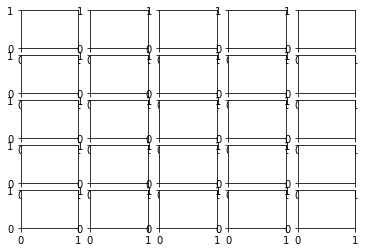

In [59]:
#
# Training the network
#
#tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('--train', help='train', action='store_true')
parser.add_argument('--epoch', help='epoch', const='int', nargs='?', default=10)
args, unknown = parser.parse_known_args()


model.fit(x_train, y_train, batch_size=128, epochs=20)
model.save_weights('weights_006.h5')


axes=[0 for _ in range(100)]
fig, axes = plt.subplots(5,5)

### Обнаружение объектов на тестовых изображениях

<ipython-input-61-3452b9fe1232>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(5,5,j+1)


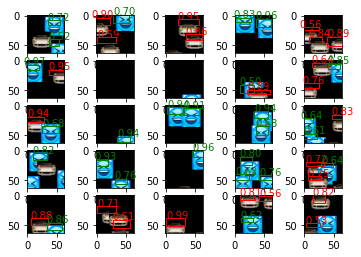

In [61]:
#
# Predict bounding box and classes for the first 25 images
#
for j in range(0,25):
    im = load_image(j)

    #
    # Predict bounding box and classes
    #
    img = cv2.imread('Images/%d.PNG' % j)
    #img = cv2.resize(img, (img_w,img_h))
    #data = img_to_array(img)
    P = model.predict(np.array([ img_to_array(img) ]))
 
    #
    # Draw each boxes and class score over each images using pyplot
    #
    col = 0
    for row in range(grid_w):
        for col in range(grid_h):
            p = P[0][col*grid_h+row]

            boxes = p[3:].reshape(nb_boxes,5)
            clss = np.argmax(p[0:2])
            
            ax = plt.subplot(5,5,j+1)
            imgplot = plt.imshow(img)

            i = 0
            for b in boxes:
                x = b[0]+float(row)
                y = b[1]+float(col)
                w = b[2]
                h = b[3]
                conf = b[4]
                if conf < 0.5:
                    continue

                color = ['r','g','b','0'][clss]
                rect = patches.Rectangle((x*cell_w-w/2*img_w, y*cell_h-h/2*img_h), w*img_h, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                #rect = patches.Rectangle((30, 15), 20, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                ax.add_patch(rect)

                ax.text( (x*cell_w-w/2*img_w) / img_w, 1-(y*cell_h-h/2*img_h)/img_h-i*0.15, "%0.2f" % (conf), transform=ax.transAxes, color=color)
                i+=1

plt.show()


